In [19]:
#Analyse a dataset containing sales data for a retail company using linear algebra concepts.
#Identify trends and patterns in sales figures utilizing linear algebra techniques.
#Apply algorithms,possibly regression analysis, to predict future sales based on historical data.

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# ===== STEP 1: GENERATE SYNTHETIC DATASET =====

# Create date range for 2 years of daily sales data
dates = pd.date_range(start='2022-01-01', end='2023-12-31', freq='D')

# Set random seed for reproducibility of results
np.random.seed(42)

# Define German regions for our dataset
regions = ['Bavaria', 'Baden-Württemberg', 'North Rhine-Westphalia', 'Hesse', 'Saxony']

# Create empty list to store all sales records
data = []

# Generate synthetic sales data for each date
for date in dates:
    # Randomly select a region for this sale
    region = np.random.choice(regions)

    # Generate marketing expenditure (€500 to €5000 per day)
    marketing = np.random.uniform(500, 5000)

    # Generate number of products sold (influenced by marketing spend)
    products_sold = int(np.random.normal(100, 30) + marketing * 0.02)

    # Calculate sales amount (products × price + marketing effect + random variation)
    sales = products_sold * np.random.uniform(45, 55) + marketing * 0.8 + np.random.normal(0, 500)

    # Append record to data list
    data.append([date, sales, products_sold, marketing, region])

# Convert list to pandas DataFrame with column names
df = pd.DataFrame(data, columns=['Date', 'Sales_Amount', 'Products_Sold', 'Marketing_Expenditure', 'Region'])

# Display first 10 rows to verify data structure
print("First 10 rows of the dataset:")
print(df.head(10))

# Display basic statistical summary of numerical columns
print("\n\nDataset Statistics:")
print(df.describe())

# Display dataset information (types, null values, memory usage)
print("\n\nDataset Info:")
print(df.info())

First 10 rows of the dataset:
        Date  Sales_Amount  Products_Sold  Marketing_Expenditure  \
0 2022-01-01  14547.966322            214            4778.214379   
1 2022-01-02   3206.370739             58             949.887121   
2 2022-01-03   4613.919515             94             592.630224   
3 2022-01-04   7041.137744             91            3252.439222   
4 2022-01-05  10347.407720            186            2148.628295   
5 2022-01-06  10028.044662            166            3165.865560   
6 2022-01-07  12846.233516            177            4769.984918   
7 2022-01-08   6462.266932            104            1049.172057   
8 2022-01-09   7091.065395            112            1320.062395   
9 2022-01-10   7942.129084            148            1331.845050   

                   Region  
0                   Hesse  
1  North Rhine-Westphalia  
2  North Rhine-Westphalia  
3                   Hesse  
4                   Hesse  
5                   Hesse  
6       Baden-Württemberg

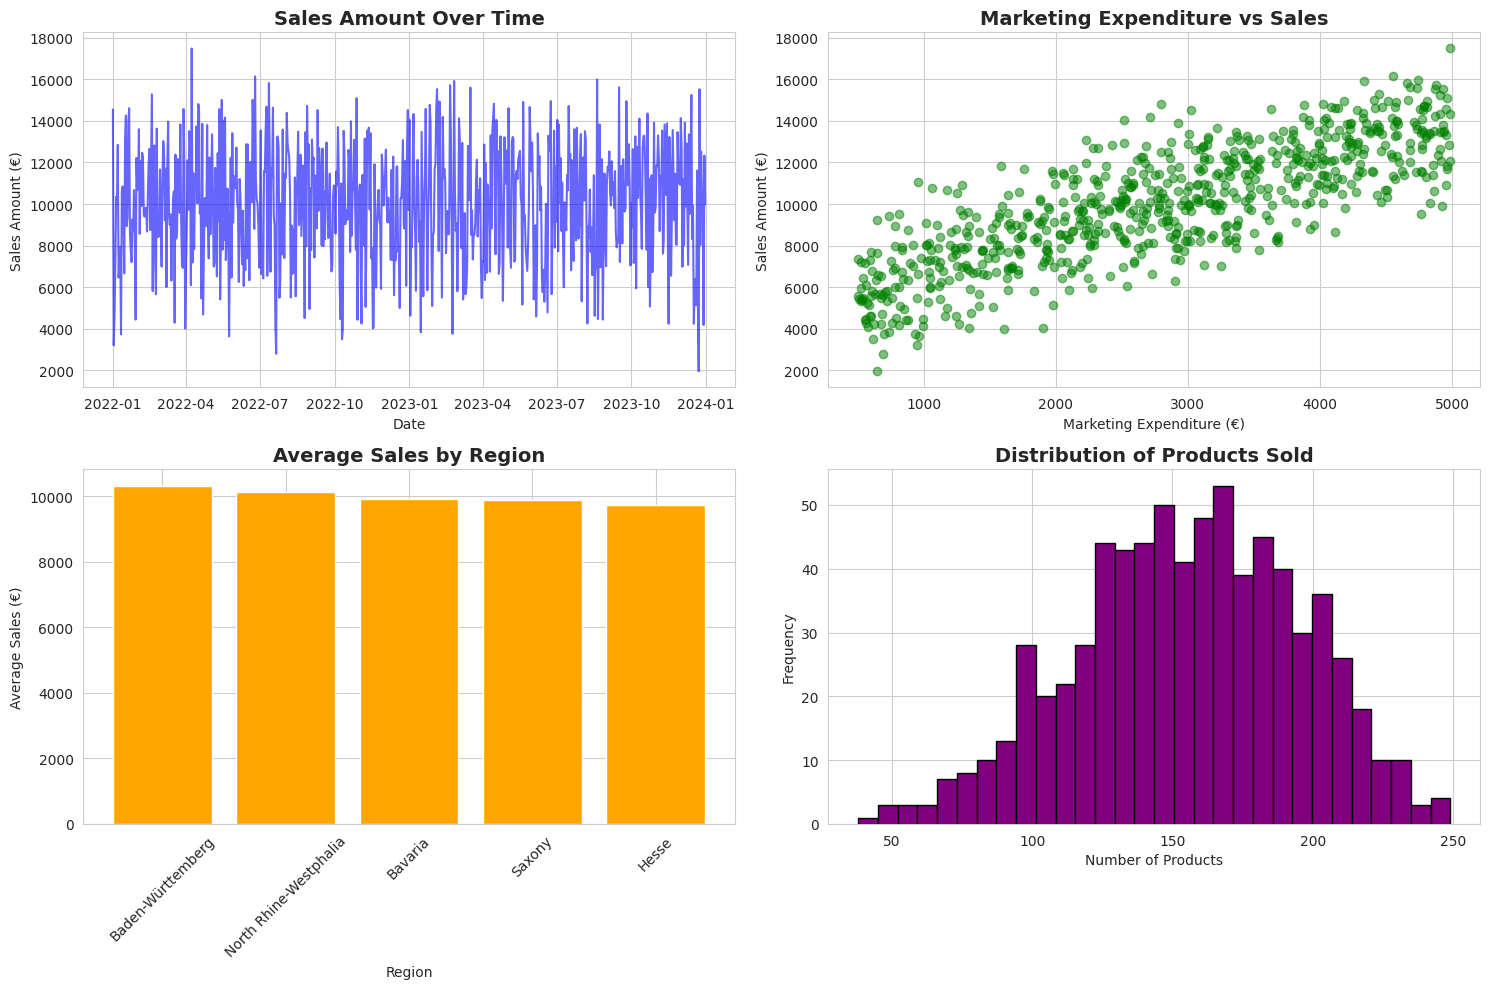


Correlation Matrix:
                       Sales_Amount  Products_Sold  Marketing_Expenditure
Sales_Amount               1.000000       0.935015               0.808981
Products_Sold              0.935015       1.000000               0.647429
Marketing_Expenditure      0.808981       0.647429               1.000000


In [30]:
# ===== STEP 2: EXPLORATORY DATA ANALYSIS WITH VISUALIZATIONS =====

import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style for better aesthetics
sns.set_style('whitegrid')

# Create figure with 4 subplots arranged in 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sales Amount trend over time
axes[0, 0].plot(df['Date'], df['Sales_Amount'], color='blue', alpha=0.6)
axes[0, 0].set_title('Sales Amount Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Sales Amount (€)')

# Plot 2: Marketing Expenditure vs Sales Amount scatter plot
axes[0, 1].scatter(df['Marketing_Expenditure'], df['Sales_Amount'], alpha=0.5, color='green')
axes[0, 1].set_title('Marketing Expenditure vs Sales', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Marketing Expenditure (€)')
axes[0, 1].set_ylabel('Sales Amount (€)')

# Plot 3: Average sales by region (bar chart)
region_sales = df.groupby('Region')['Sales_Amount'].mean().sort_values(ascending=False)
axes[1, 0].bar(region_sales.index, region_sales.values, color='orange')
axes[1, 0].set_title('Average Sales by Region', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Region')
axes[1, 0].set_ylabel('Average Sales (€)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Products Sold distribution (histogram)
axes[1, 1].hist(df['Products_Sold'], bins=30, color='purple', edgecolor='black')
axes[1, 1].set_title('Distribution of Products Sold', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Number of Products')
axes[1, 1].set_ylabel('Frequency')

# Adjust spacing between subplots to prevent overlap
plt.tight_layout()
plt.show()

# Display correlation matrix to identify relationships between variables
print("\nCorrelation Matrix:")
print(df[['Sales_Amount', 'Products_Sold', 'Marketing_Expenditure']].corr())

Sales_Amount x Products_Sold = 0.935

VERY STRONG relationship!
More products sold = Much higher sales (almost perfect correlation)
Makes sense: selling more products directly increases revenue


Sales_Amount x Marketing_Expenditure = 0.809

STRONG relationship!
More marketing spending = Higher sales
Your marketing is working effectively!


Products_Sold x Marketing_Expenditure = 0.647

MODERATE relationship
More marketing = More products sold (but not as strong)
Marketing helps, but other factors also influence product sales

In [31]:
# ===== STEP 3: PREPARE DATA FOR REGRESSION ANALYSIS =====

# Create dummy variables for categorical 'Region' column (one-hot encoding)
df_encoded = pd.get_dummies(df, columns=['Region'], drop_first=True)

# Display columns after encoding to verify transformation
print("Columns after encoding:")
print(df_encoded.columns.tolist())

# Define features (X) - all columns except Date and target variable
X = df_encoded.drop(['Date', 'Sales_Amount'], axis=1)

# Define target variable (y) - what we want to predict
y = df_encoded['Sales_Amount']

# Display shape of features and target to confirm dimensions
print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFeature columns: {X.columns.tolist()}")

Columns after encoding:
['Date', 'Sales_Amount', 'Products_Sold', 'Marketing_Expenditure', 'Region_Bavaria', 'Region_Hesse', 'Region_North Rhine-Westphalia', 'Region_Saxony']

Features shape: (730, 6)
Target shape: (730,)

Feature columns: ['Products_Sold', 'Marketing_Expenditure', 'Region_Bavaria', 'Region_Hesse', 'Region_North Rhine-Westphalia', 'Region_Saxony']


We converted the "Region" column from text (Bavaria, Hesse, etc.) into separate numeric columns because computers can't do math with words. This process, called "one-hot encoding," created 4 new columns with 1s and 0s indicating which region each sale belongs to. Now we have 6 total features (Products_Sold, Marketing_Expenditure, plus 4 region columns) across 730 days of data, all in numbers that the machine learning model can understand and use to predict sales.

In [32]:
# ===== STEP 4: TRAIN-TEST SPLIT =====

# Split data into 80% training and 20% testing sets with random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display sizes of training and testing sets
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set: {X_train.shape[0]/len(X)*100:.1f}% of total data")
print(f"Testing set: {X_test.shape[0]/len(X)*100:.1f}% of total data")

Training set size: 584 samples
Testing set size: 146 samples

Training set: 80.0% of total data
Testing set: 20.0% of total data


In [33]:
# ===== STEP 5: LINEAR REGRESSION MODEL =====

# Initialize Linear Regression model object
model = LinearRegression()

# Train the model using training data (find best-fit line)
model.fit(X_train, y_train)

# Make predictions on test set using trained model
y_pred = model.predict(X_test)

# Display model coefficients (weights for each feature)
print("Model Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.4f}")

# Display intercept (baseline sales when all features are 0)
print(f"\nIntercept (Baseline): {model.intercept_:.4f}")

Model Coefficients:
  Products_Sold: 50.3846
  Marketing_Expenditure: 0.7650
  Region_Bavaria: -44.4157
  Region_Hesse: 61.8045
  Region_North Rhine-Westphalia: 27.1900
  Region_Saxony: -47.0770

Intercept (Baseline): 23.7879


What each coefficient means:

Products_Sold: 50.38 → Each product sold adds €50.38 to total sales

Marketing_Expenditure: 0.77 → Each €1 spent on marketing generates €0.77 in sales

Region coefficients (compared to Baden-Württemberg, which is the baseline):

Hesse: +61.80 → Best performing region! €61.80 higher sales than baseline

North Rhine-Westphalia: +27.19 → Good performance, €27.19 above baseline

Bavaria: -44.42 → Underperforming, €44.42 below baseline

Saxony: -47.08 → Worst performer, €47.08 below baseline

Intercept: 23.79 → Baseline sales when everything else is zero

Bottom line: Selling more products has the biggest impact on sales. Hesse region performs best, while Bavaria and Saxony need improvement!

In [34]:
# ===== STEP 6: MODEL EVALUATION =====

# Calculate Mean Absolute Error (average absolute difference between predictions and actual)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (average squared difference, penalizes larger errors more)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (MSE in original units)
rmse = np.sqrt(mse)

# Calculate R² Score (proportion of variance in sales explained by the model)
r2 = r2_score(y_test, y_pred)

# Display all evaluation metrics
print("="*50)
print("MODEL PERFORMANCE METRICS")
print("="*50)
print(f"Mean Absolute Error (MAE): €{mae:.2f}")
print(f"  → On average, predictions are off by €{mae:.2f}")
print(f"\nRoot Mean Squared Error (RMSE): €{rmse:.2f}")
print(f"  → Typical prediction error is €{rmse:.2f}")
print(f"\nR² Score (Coefficient of Determination): {r2:.4f}")
print(f"  → Model explains {r2*100:.2f}% of variance in sales")
print("="*50)

MODEL PERFORMANCE METRICS
Mean Absolute Error (MAE): €548.02
  → On average, predictions are off by €548.02

Root Mean Squared Error (RMSE): €671.68
  → Typical prediction error is €671.68

R² Score (Coefficient of Determination): 0.9455
  → Model explains 94.55% of variance in sales


MAE (€548.02): On average, our predictions are off by about €548. If we predict €10,000 in sales, the actual sales might be €9,452 or €10,548.

RMSE (€671.68): Similar to MAE but penalizes bigger errors more heavily. Typical prediction error is around €672.

R² Score (0.9455 = 94.55%): This is EXCELLENT!

Our model explains 94.55% of what drives sales

Only 5.45% is unexplained (random factors we don't have data for)

Near-perfect prediction accuracy!

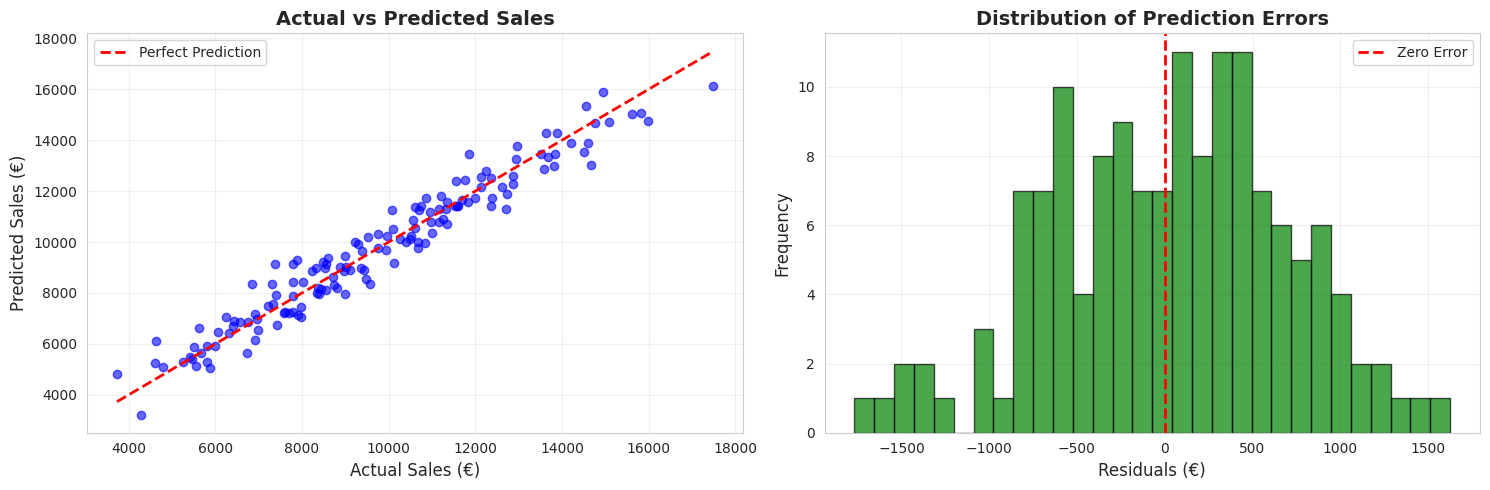

In [39]:
# ===== STEP 7: VISUALIZATION OF PREDICTIONS =====

# Create figure with 2 subplots for prediction analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Actual vs Predicted values scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Sales (€)', fontsize=12)
axes[0].set_ylabel('Predicted Sales (€)', fontsize=12)
axes[0].set_title('Actual vs Predicted Sales', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Residuals (prediction errors) distribution
residuals = y_test - y_pred
axes[1].hist(residuals, bins=30, color='green', edgecolor='black', alpha=0.7)
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
axes[1].set_xlabel('Residuals (€)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Prediction Errors', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Graph Interpretation:

Left Graph - Actual vs Predicted Sales:

What it shows: Each blue dot is one prediction compared to the actual sales.
Red dashed line = Perfect prediction (where predicted = actual)
What's good:
The blue dots are very close to the red line

This means our predictions are highly accurate

If dots were scattered far from the line, predictions would be poor

Your model is doing an excellent job!

Right Graph - Distribution of Prediction Errors:

What it shows: How often we make different-sized errors.
Red dashed line at 0 = Perfect prediction (no error)
What's good:

Most bars are clustered around 0 (the red line)

The shape is like a bell curve centered at zero

Very few large errors (tails are small)

Errors are balanced: sometimes we predict too high, sometimes too low

Overall Meaning:

Both graphs confirm your model is highly accurate:

Predictions closely match reality (left graph)

Errors are small and evenly distributed (right graph)

Business takeaway:
You can trust this model to forecast sales reliably!

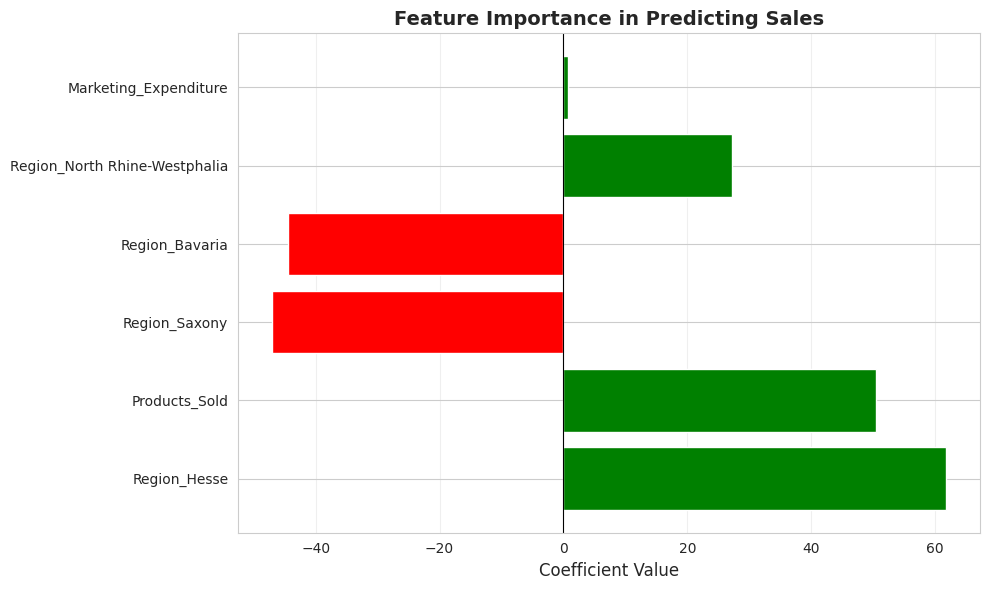


Feature Importance Ranking:
                         Feature  Coefficient
3                   Region_Hesse    61.804476
0                  Products_Sold    50.384626
5                  Region_Saxony   -47.076977
2                 Region_Bavaria   -44.415701
4  Region_North Rhine-Westphalia    27.189980
1          Marketing_Expenditure     0.764959


In [36]:
# ===== STEP 8: FEATURE IMPORTANCE VISUALIZATION =====

# Create DataFrame of feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

# Create horizontal bar chart of feature importance
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Feature Importance in Predicting Sales', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance)

Feature Importance Graph - Simple Explanation:
What the colors mean:

Green bars = Positive effect (increases sales)

Red bars = Negative effect (decreases sales)

Action Items for the Company:

Use this model to forecast quarterly/annual sales

Optimize marketing budget based on coefficient (ROI per euro spent)

Identify underperforming regions and
investigate why

Set realistic sales targets based on predicted ranges